In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from datetime import datetime

In [5]:
# Choose city:
city = 'Detroit'

# Choose starting hour and number of hour to look at/graph
starting_hour = 1
hour = 8760             #choose number of hours to graph

# Choose building id

building_id = 56

# Read resstock results summary folder:
B = list(range(400))
if city == 'Detroit':
    load_folder = 'C:\\Users\\atpha\\Downloads\\400 Buildings - HP\\'
else:
    load_folder = 'C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\\Data\\400_Buildings_EB\\LA_NYC_ORL_SEA_ATL_MIN_PHX\\'

resstock_results = pd.read_csv(load_folder + 'results.csv')
resstock_results = resstock_results[resstock_results['building_characteristics_report.location_city'].str.contains(city) == True]
#resstock_results = resstock_results[(resstock_results['apply_upgrade.run_measure'] == 0) & (resstock_results['apply_upgrade_2.run_measure'] == 0)]
resstock_results = resstock_results.sort_values(by='build_existing_model.building_id')
resstock_results['build_existing_model.building_id'] = resstock_results['build_existing_model.building_id'] % 400
resstock_results.loc[resstock_results['build_existing_model.building_id'] ==0, 'build_existing_model.building_id'] = 400
resstock_results = resstock_results.reset_index()
resstock_results = resstock_results.drop(['index'], axis=1)

resstock_building_id = building_id

folder_id = resstock_results.loc[resstock_results['build_existing_model.building_id'] == resstock_building_id, '_id']
folder_id = folder_id.reset_index()
folder_id = folder_id.drop(['index'], axis=1)
folder_id = folder_id.iloc[0,0]

archive = zipfile.ZipFile(load_folder + folder_id + '\\' + 'data_point.zip')

load_data_path = archive.extract('enduse_timeseries.csv', load_folder + folder_id + '\\')
load_data_raw = pd.read_csv(load_data_path)
archive.close()

# Hourly load
#load_data_annual = load_data_raw['total_site_electricity_kwh']
load_heating_annual = load_data_raw['electricity_fans_heating_kwh']/load_data_raw['electricity_heating_kwh']
load_cooling_annual = load_data_raw['electricity_fans_cooling_kwh']/load_data_raw['electricity_cooling_kwh']


load_heating_annual = load_heating_annual.reset_index()

load_heating_annual


,index,0
0,0,0.037507
1,1,0.041661
2,2,0.040176
3,3,0.041583
4,4,0.030550
...,...,...
8755,8755,0.190112
8756,8756,0.190245
8757,8757,0.190241
8758,8758,0.158069


In [23]:
load_heating_annual['index']

0          0
1          1
2          2
3          3
4          4
        ... 
8755    8755
8756    8756
8757    8757
8758    8758
8759    8759
Name: index, Length: 8760, dtype: int64

In [19]:
load_heating_annual.index

RangeIndex(start=0, stop=8760, step=1)

(0.0, 8759.0)

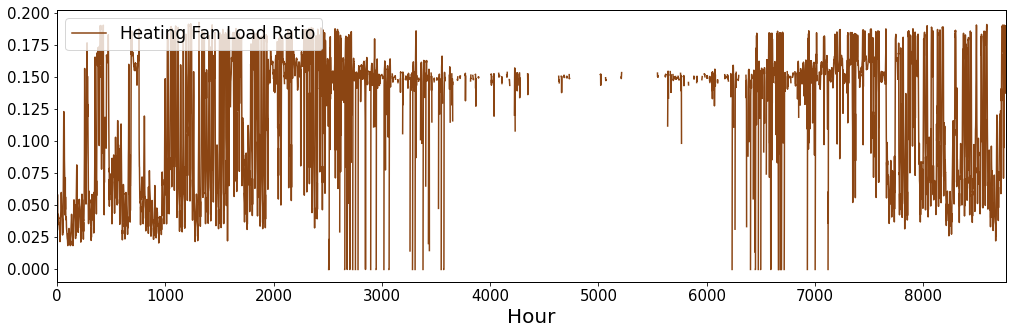

In [6]:
# Graph the load:
fig, ax = plt.subplots(figsize=(17,5))
plt.plot(load_heating_annual['index'], load_heating_annual[0], label = "Heating Fan Load Ratio", color='saddlebrown')
plt.legend(loc='upper left', fontsize=17)
plt.xlabel("Hour",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.xlim(load_heating_annual['index'].min(),load_heating_annual['index'].max())